# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv("HRV.csv")

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
chol=dataset['totChol'].median()
dataset['totChol'].fillna(chol, inplace=True)

In [10]:
HR=dataset['heartRate'].median()
dataset['heartRate'].fillna(HR, inplace=True)

In [8]:
bmi=dataset['BMI'].median()
dataset['BMI'].fillna(bmi, inplace=True)

In [7]:
glucose=dataset['glucose'].median()
dataset['glucose'].fillna(glucose, inplace=True)

In [11]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [12]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
X=dataset.drop('TenYearCHD',axis=1)
Y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=.2,
                                               random_state=50)

## Training the Logistic Regression model 

In [15]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
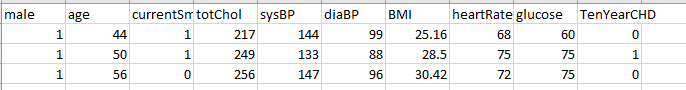

In [19]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))
#This prediction was correct

[0]


In [20]:
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))
#This prediction was not correct 

[0]


In [21]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))
#This prediction was correct

[0]


### Confusion matrix, Confusion matrix display and classification report

In [22]:
y_pred=classifier.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[705  10]
 [123   9]]


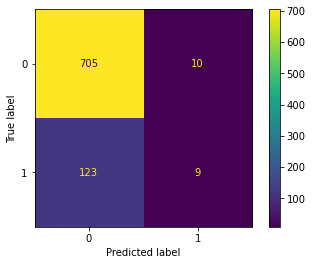

In [26]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

- True Positive: Actual results and model predicted results were both postiive. There were 9 of these.
- True Negative: The actual results were negative and the model predicted a negative. There were 705 of these. 
- False Positive: The actual results were negative but the model predicted a positive. There were 10 of these. 
- False Negative: The actual results were positive but the model predicted a positive. There were 9 of these. 

### Summary

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       715
           1       0.47      0.07      0.12       132

    accuracy                           0.84       847
   macro avg       0.66      0.53      0.52       847
weighted avg       0.79      0.84      0.79       847



This dataset provided information on the diagnosis of heart disease. The variables used to predict a diagnosis are: sex, age, smoking, cholesterol levels, systolic blood pressure, BMI, heart rate, and glucose levels. Using logistic regression, I attempted to predict if these variables had an affect on whether an individual had heart disease. My model had an accuracy score of 84% which means it is a decent model. 